In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import tikzplotlib

from tueplots import cycler, fonts, fontsizes, bundles
#from tueplots.constants import markers
from tueplots.constants.color import palettes

plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
#plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
#plt.rcParams.update(fontsizes.aistats2022())
#plt.rcParams['axes.grid'] = False

In [3]:
data = pd.read_csv('runtime_results.csv', index_col=None)
data["dimensions"] = ["$%s$" % x for x in data["d"]]
data["samples"] = ["$%s$" % x for x in data["n"]]
data = data[data.d != 10]
data.head()

,n,d,tsne_fwd [s],compute cov [s],dimensions,samples
1,10,21,7.414664,1.216083,$21$,$10$
2,10,46,7.450451,1.245328,$46$,$10$
3,10,100,7.448123,1.247764,$100$,$10$
4,10,215,7.391356,1.258985,$215$,$10$
5,10,464,6.059031,1.435987,$464$,$10$


In [3]:
n_set = sorted(list(set(data['n'])))
p_set = sorted(list(set(data['d'])))

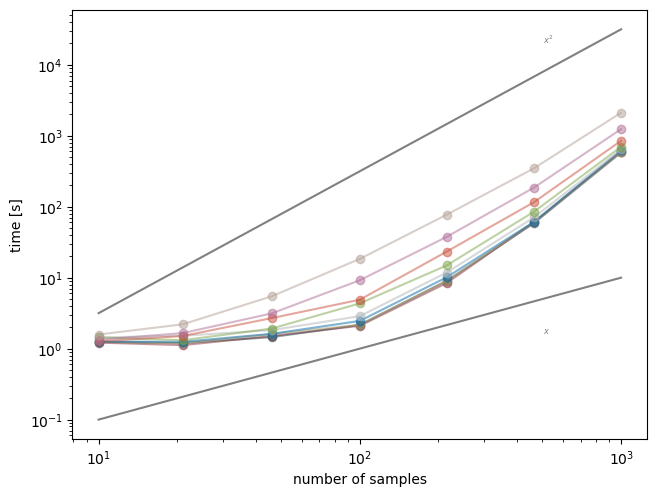

In [19]:
fig = plt.figure(tight_layout = {'pad': 0.1})
for i, j in enumerate(p_set):
  d = data[data.d == j]
  plt.plot(d['n'], d['compute cov [s]'], marker='o', alpha=0.5, label=str(j))
plt.yscale('log', base=10)
plt.xscale('log', base=10) 
plt.xlabel('number of samples')
plt.ylabel('time [s]')
plt.plot(n_set, np.array(n_set)/10**2, c='grey')
plt.plot(n_set, np.array(n_set)**2/10**1.5, c='grey')
plt.text(10 ** 2.7, 10 ** 4.3, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 2.7, 1.6, 'x', c='grey', fontsize=6, fontstyle='italic')
tikzplotlib.save("figures_diss/runtimeSamples.pgf")

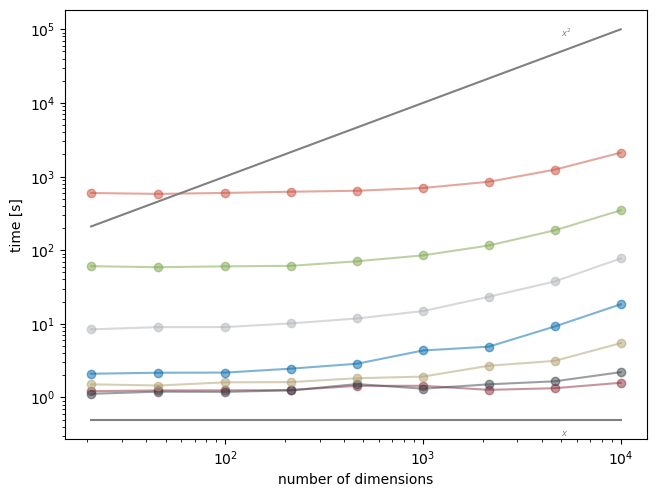

In [28]:
fig = plt.figure(tight_layout = {'pad': 0.1})
for i, j in enumerate(n_set):
  d = data[data.n == j]
  plt.plot(d['d'], d['compute cov [s]'], marker='o', alpha=0.5, label=str(j))
plt.yscale('log', base=10)
plt.xscale('log', base=10) 
plt.xlabel('number of dimensions')
plt.ylabel('time [s]')
plt.plot(p_set, [0.5 for i in range(len(p_set))], c='grey')
plt.plot(p_set, np.array(p_set)/0.1, c='grey')
plt.text(10 ** 3.7, 10 ** 4.9, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 3.7, 0.3, 'x', c='grey', fontsize=6, fontstyle='italic')
tikzplotlib.save("figures_diss/runtimeDimensions.pgf")

In [29]:
print(n_set, p_set)

[10, 21, 46, 100, 215, 464, 1000] [21, 46, 100, 215, 464, 1000, 2154, 4641, 10000]
